# Proyek KASDD Ganjil 2023/24 : Valorant Pro Matches
**Nama Kelompok**: TSTKPlusSatu

| Nama                          | NPM         | Kelas |
|-------------------------------|-------------|-------|
| Kevin Alexander               | 2106705026  | B     |
| Emir Shamsuddin Fadhlurrahman | 2106632541  | F     |
| Michael Christlambert Sinanta | 2106750414  | F     |
| Vinsen Wijaya                 | 2106637776  | F     |


**Cara Menjalankan Program:**

1. Siapkan file yang dibutuhkan dalam satu folder.
```
    Folder
    │
    └─── tk-kasdad.ipynb
    │   
    └─── games.csv
    │   
    └─── matches.csv
    │   
    └─── scores.csv
    │   
    └─── agent_encode.csv
```
* Dataset dapat diakses pada [link](https://drive.google.com/drive/folders/1Fd8342inMJjF46Df7aMlo51qEvtWfl3s) ini
2. Jalankan program dengan menekan "Run All"
3. Program dapat berhasil dijalankan.

## Install Library

In [55]:
%pip install pandas numpy seaborn scipy plotly matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


##  Import Library

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt

# Read Dataset

In [57]:
df = pd.read_csv('dataset_final/final_dataset.csv')
df.head()

,GameID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,...,Patch,EventID,EventName,EventStage,Team1ID,Team2ID,Team1,Team2,Team1_MapScore,Team2_MapScore
0,60894,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,14.0,195.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
1,60894,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,6.0,161.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
2,60894,diaamond,Boos,sova,226.0,17.0,9.0,8.0,8.0,148.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
3,60894,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,5.0,141.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
4,60894,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,-8.0,55.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1


## Data Analysis

Kolom yang relevan terhadap analisis pick-rate agent adalah kolom `Agent` dan `Patch`, informasi lain pada dataframe kurang relevan.

In [58]:
df_pickrate = df[['Agent', 'Patch']]
df_pickrate.columns

Index(['Agent', 'Patch'], dtype='object')

Pada tahap Pre-processing, semua `Patch` telah digeneralisasi menjadi Patch 1.X, 2.X, dan 3.X. Sehingga data langsung dapat langsung dibuatkan plot

C:\Users\vinse\AppData\Local\Temp\ipykernel_14840\1748675435.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pickrate[df_pickrate['Patch'] == 1.0], x='Agent', order=hue_order, legend=False, palette='magma')
C:\Users\vinse\AppData\Local\Temp\ipykernel_14840\1748675435.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pickrate[df_pickrate['Patch'] == 2.0], x='Agent', order=hue_order, legend=False, palette='magma')
C:\Users\vinse\AppData\Local\Temp\ipykernel_14840\1748675435.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn

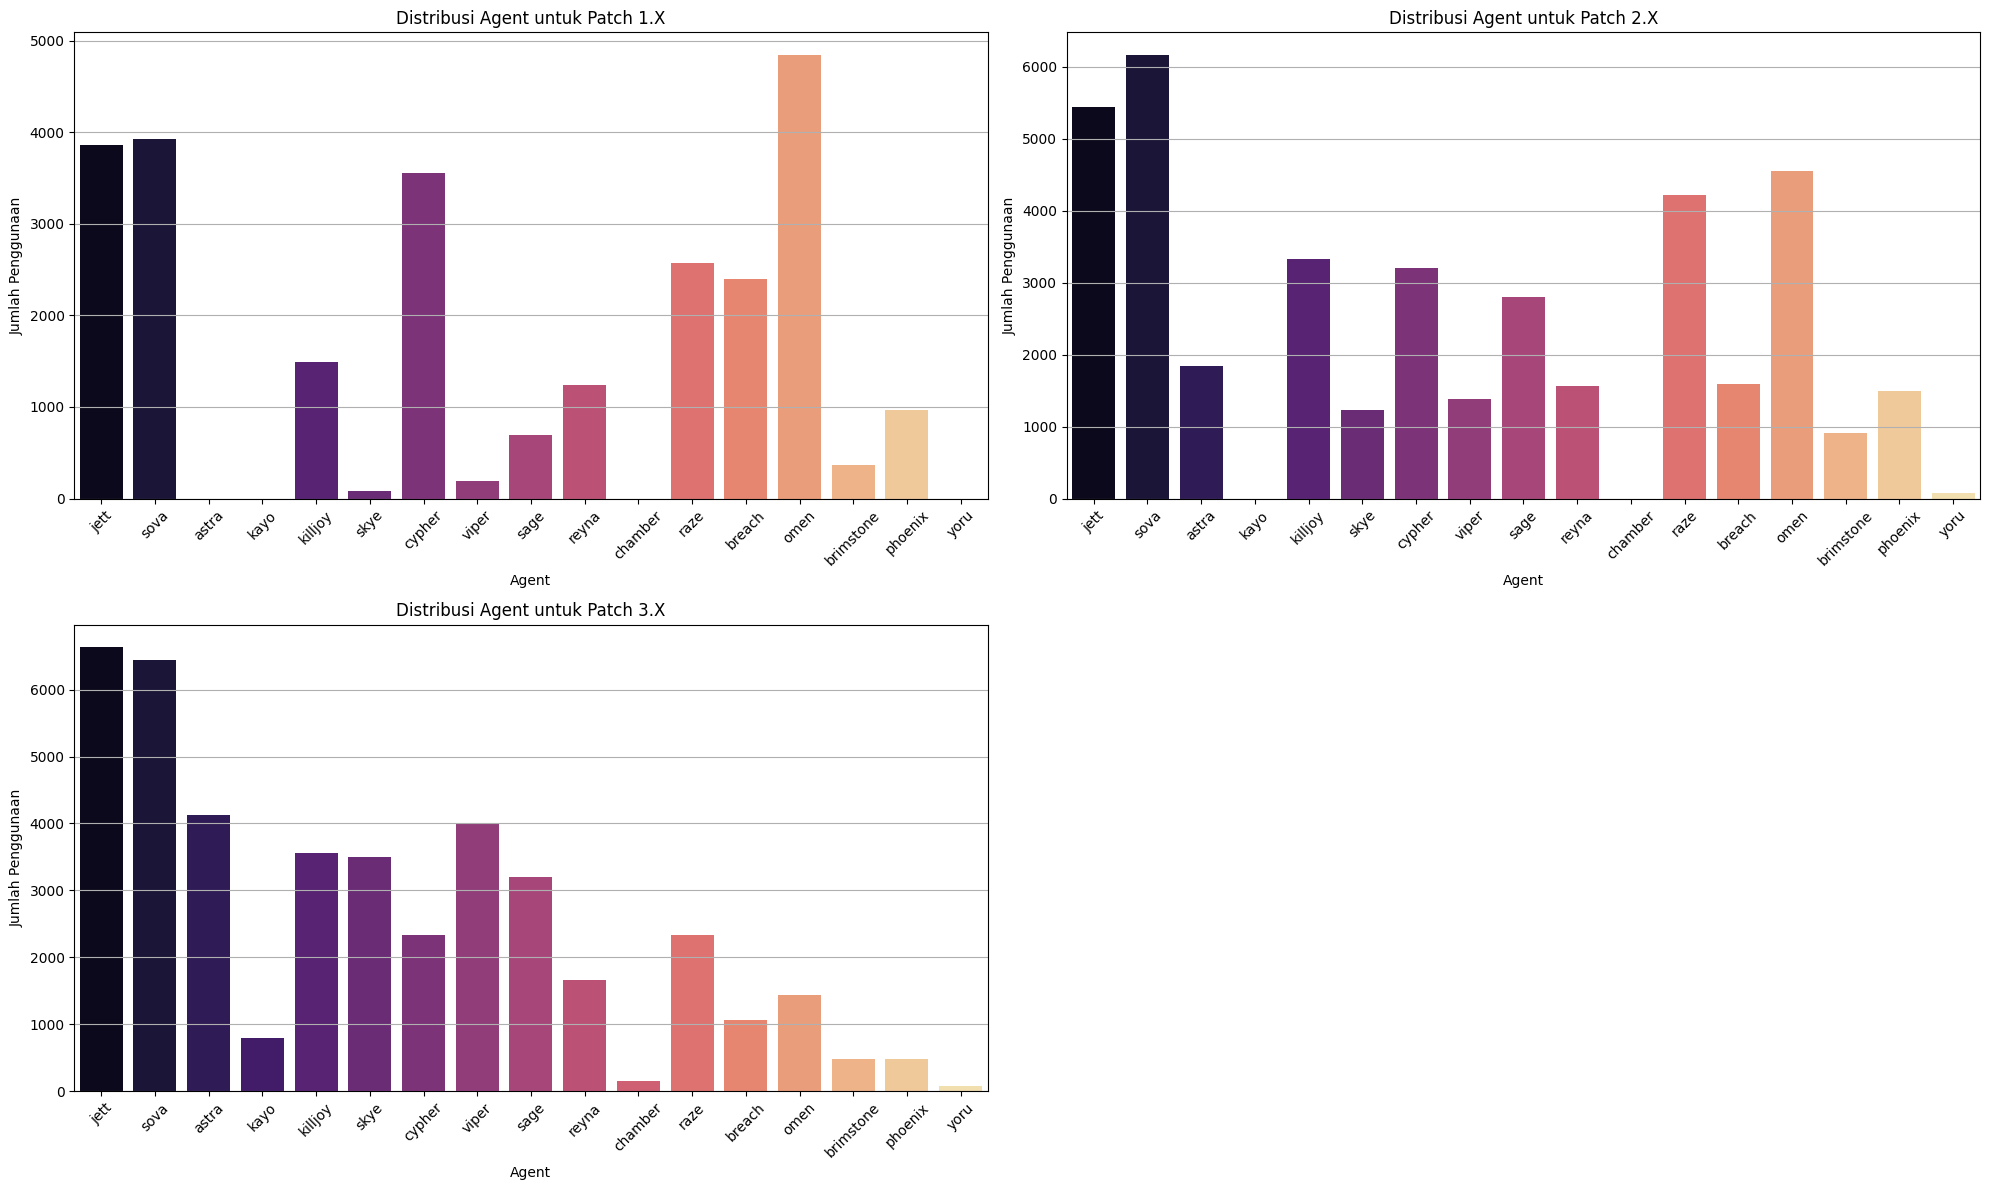

In [59]:
df_encode = pd.read_csv('dataset/agent_encode.csv') # untuk kebutuhan hue_order
hue_order = df_encode['Agent']

plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
sns.countplot(data=df_pickrate[df_pickrate['Patch'] == 1.0], x='Agent', order=hue_order, legend=False, palette='magma')
plt.title('Distribusi Agent untuk Patch 1.X')
plt.xlabel('Agent')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Penggunaan')
plt.grid(axis='y')
plt.tight_layout()

plt.subplot(2, 2, 2)
sns.countplot(data=df_pickrate[df_pickrate['Patch'] == 2.0], x='Agent', order=hue_order, legend=False, palette='magma')
plt.title('Distribusi Agent untuk Patch 2.X')
plt.xlabel('Agent')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Penggunaan')
plt.grid(axis='y')
plt.tight_layout()

plt.subplot(2, 2, 3)
sns.countplot(data=df_pickrate[df_pickrate['Patch'] == 3.0], x='Agent', order=hue_order, legend=False, palette='magma')
plt.title('Distribusi Agent untuk Patch 3.X')
plt.xlabel('Agent')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Penggunaan')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

C:\Users\vinse\AppData\Local\Temp\ipykernel_14840\179767324.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pickrate[df_pickrate['Agent'] == agent],
C:\Users\vinse\AppData\Local\Temp\ipykernel_14840\179767324.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pickrate[df_pickrate['Agent'] == agent],
C:\Users\vinse\AppData\Local\Temp\ipykernel_14840\179767324.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pickrate[df_pickrate['Agent'] == agent],
C:\Users\vinse\AppData\Local\Temp\ipykernel_14840\17976

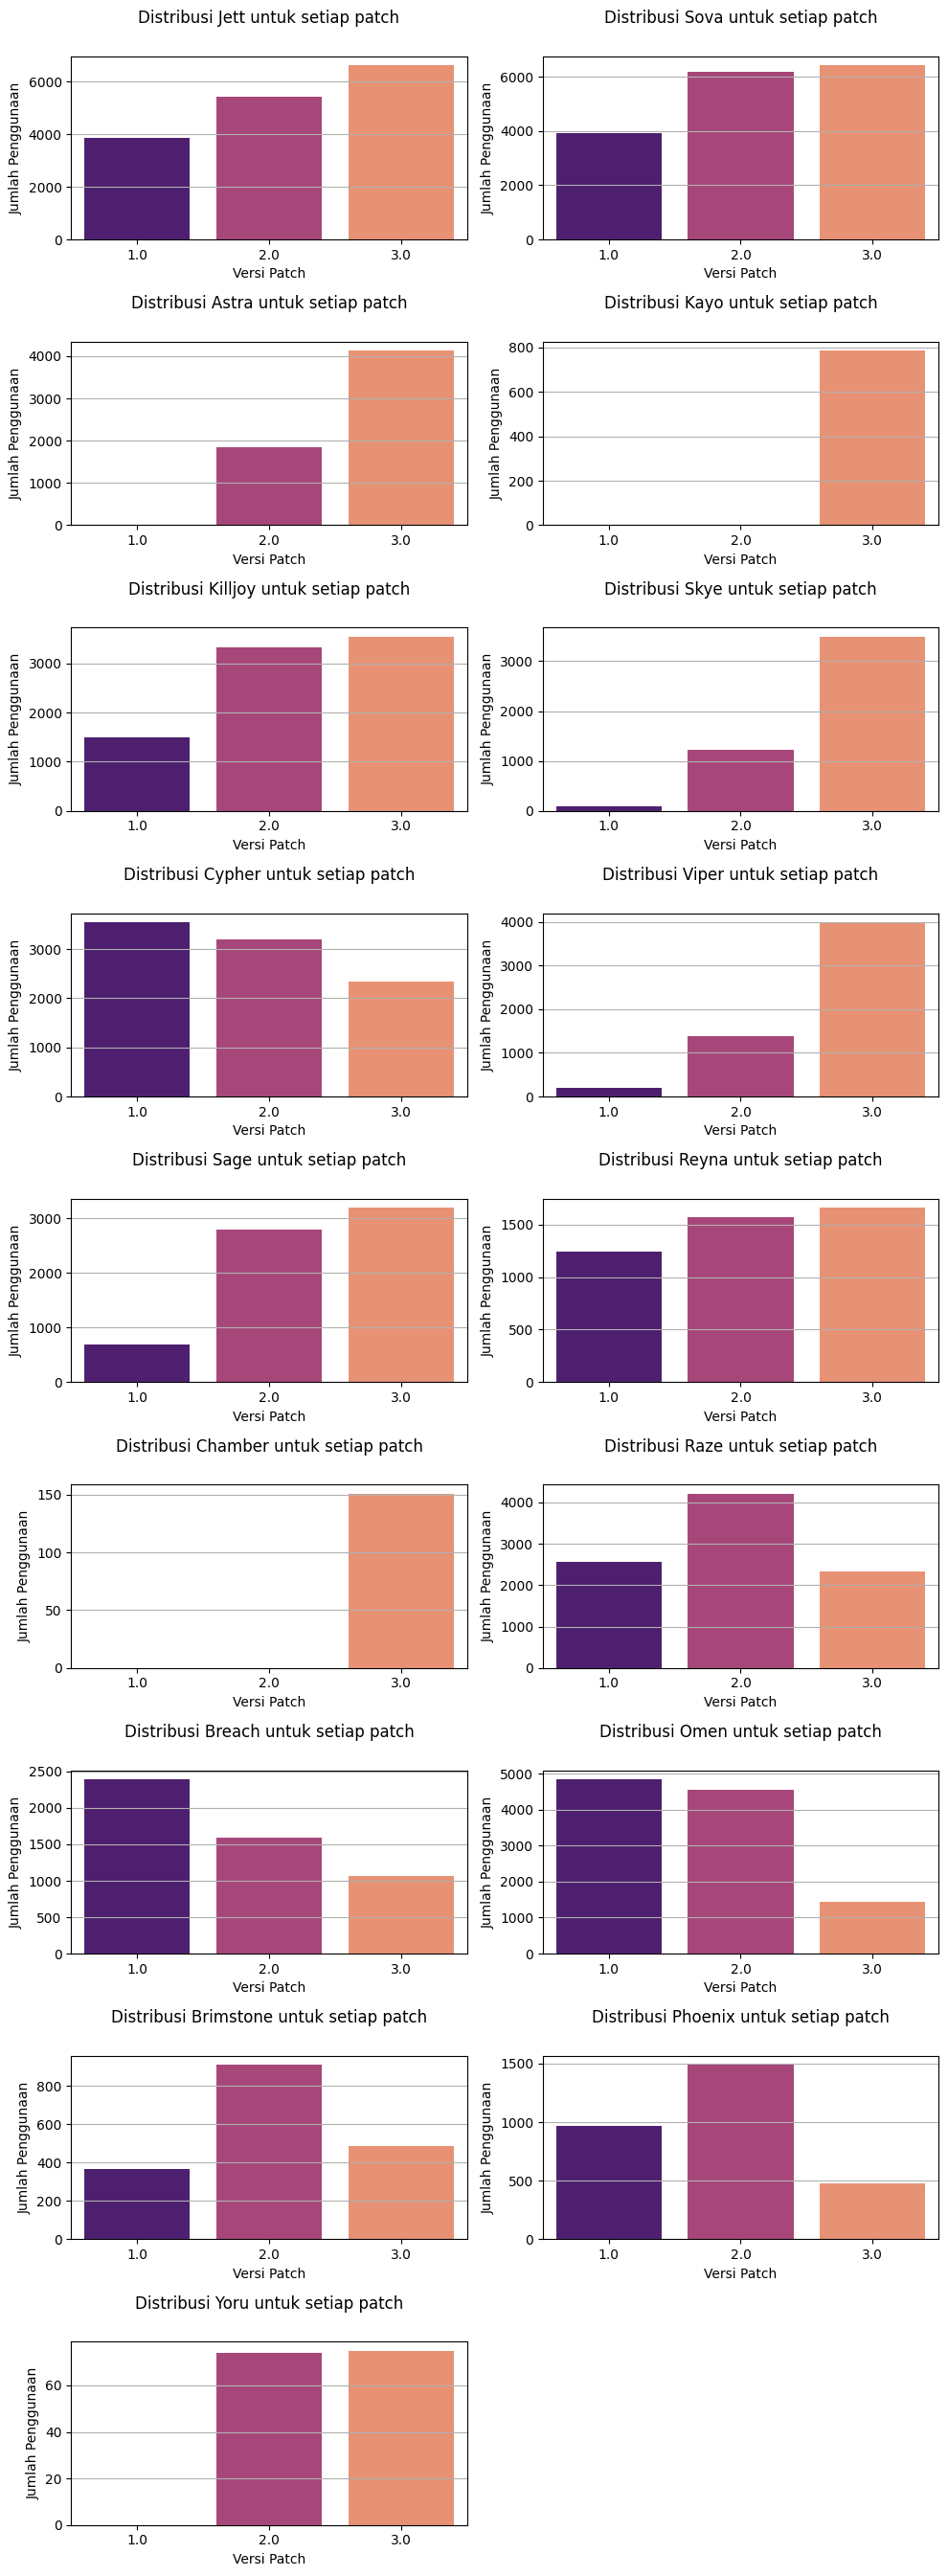

In [60]:
patch_order = df_pickrate['Patch'].sort_values().unique()
num_agents = len(hue_order)
num_cols = 2
num_rows = (num_agents + num_cols - 1) // num_cols

plt.figure(figsize=(10, 3 * num_rows))

for i, agent in enumerate(hue_order, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df_pickrate[df_pickrate['Agent'] == agent], 
                  x='Patch', palette='magma', order=patch_order, legend=False)
    plt.title(f'Distribusi {agent.capitalize()} untuk setiap patch', pad=25)
    plt.xlabel('Versi Patch')
    plt.ylabel('Jumlah Penggunaan')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()